In [12]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms

import medmnist
from medmnist import INFO, Evaluator

In [13]:
data_flag = 'bloodmnist'
download = True

NUM_EPOCHS = 3
BATCH_SIZE = 128
lr = 0.001

info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

DataClass = getattr(medmnist, info['python_class'])

In [14]:
# preprocessing
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])

# load the data
train_dataset = DataClass(split='train', transform=data_transform, download=download)
test_dataset = DataClass(split='test', transform=data_transform, download=download)

pil_dataset = DataClass(split='train', download=download)

# encapsulate data into dataloader form
train_loader = data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
train_loader_at_eval = data.DataLoader(dataset=train_dataset, batch_size=2*BATCH_SIZE, shuffle=False)
test_loader = data.DataLoader(dataset=test_dataset, batch_size=2*BATCH_SIZE, shuffle=False)

Using downloaded and verified file: /home/vini/.medmnist/bloodmnist.npz
Using downloaded and verified file: /home/vini/.medmnist/bloodmnist.npz
Using downloaded and verified file: /home/vini/.medmnist/bloodmnist.npz


# Testing dataset

In [16]:
print(train_dataset)
print("===================")
print(test_dataset)

Dataset BloodMNIST (bloodmnist)
    Number of datapoints: 11959
    Root location: /home/vini/.medmnist
    Split: train
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'basophil', '1': 'eosinophil', '2': 'erythroblast', '3': 'immature granulocytes(myelocytes, metamyelocytes and promyelocytes)', '4': 'lymphocyte', '5': 'monocyte', '6': 'neutrophil', '7': 'platelet'}
    Number of samples: {'train': 11959, 'val': 1712, 'test': 3421}
    Description: The BloodMNIST is based on a dataset of individual normal cells, captured from individuals without infection, hematologic or oncologic disease and free of any pharmacologic treatment at the moment of blood collection. It contains a total of 17,092 images and is organized into 8 classes. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images with resolution 3×360×363 pixels are center-cropped into 3×200×200, and then resized into 3×28×28.
    License: CC BY 4.0


/home/vini/.local/lib/python3.10/site-packages/medmnist/utils.py:25: FutureWarning: `multichannel` is a deprecated argument name for `montage`. It will be removed in version 1.0. Please use `channel_axis` instead.
  montage_arr = skimage_montage(sel_img, multichannel=(n_channels == 3))


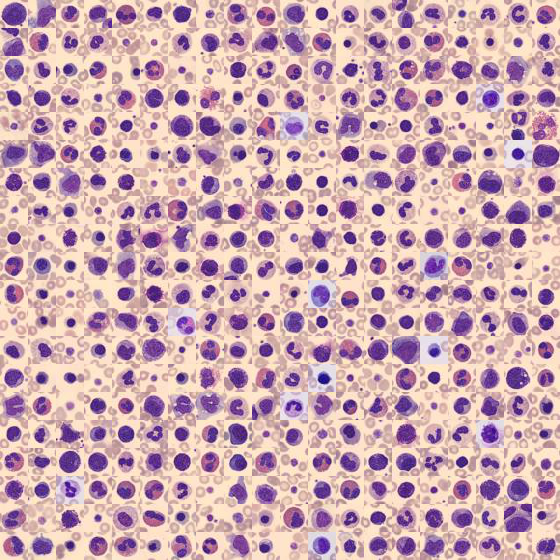

In [17]:
# visualization

train_dataset.montage(length=20)

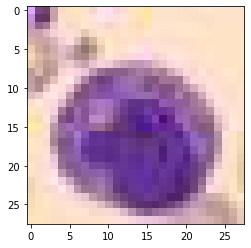

In [20]:
# visualizing the images
img_train = train_dataset.imgs
img_test = test_dataset.imgs

i = 30
plt.imshow(img_train[i], cmap="Greys_r")
plt.show()

In [19]:
# visualizing the images
img_train = train_dataset.imgs
img_val = val_dataset.imgs
img_test = test_dataset.imgs

i = 0
plt.imshow(img_train[i], cmap="Greys_r")
plt.show()

NameError: name 'val_dataset' is not defined

In [ ]:
print(train_dataset)
print("========================================")
print(val_dataset)
print("========================================")
print(test_dataset)

In [ ]:
train_dataset.montage(length = 20)

# Checking the balance between clases

In [ ]:
print(f"TRAINING: {np.count_nonzero(labels_train == 0)} cancer e {np.count_nonzero(labels_train == 1)} normais")
print(f"VALIDATION: {np.count_nonzero(labels_val == 0)} cancer e {np.count_nonzero(labels_val == 1)} normais")
print(f"TEST: {np.count_nonzero(labels_test == 0)} cancer e {np.count_nonzero(labels_test == 1)} normais")

In [ ]:
print((147+21)/(147+21+399+57))